In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#File path
file_path=r'C:\Users\castl\Downloads\Data_Lionel\Data_Lionel\SMC_data\HEPData-ins471981-v1-csv\Table5.csv'

In [12]:
#Read the CSV file, skipping the comment lines that start with #
data=pd.read_csv(file_path, comment='#')

In [13]:
#Clean column names (remove extra spaces)
data.columns=data.columns.str.strip()

In [14]:
#Calculate X as the average of X LOW and X HIGH
data['X_avg']=(data['X LOW']+data['X HIGH'])/2

In [15]:
#Extract the relevant columns
x_avg=data['X_avg']
q2_mean=data['MEAN(NAME=Q**2) [GEV**2]']
g1=data['G1']
stat_plus=data['stat +']
stat_minus=data['stat -']

In [16]:
#Calculate symmetric error bars (take absolute values)
stat_error=np.abs(stat_plus)  # Since stat_minus is negative of stat_plus

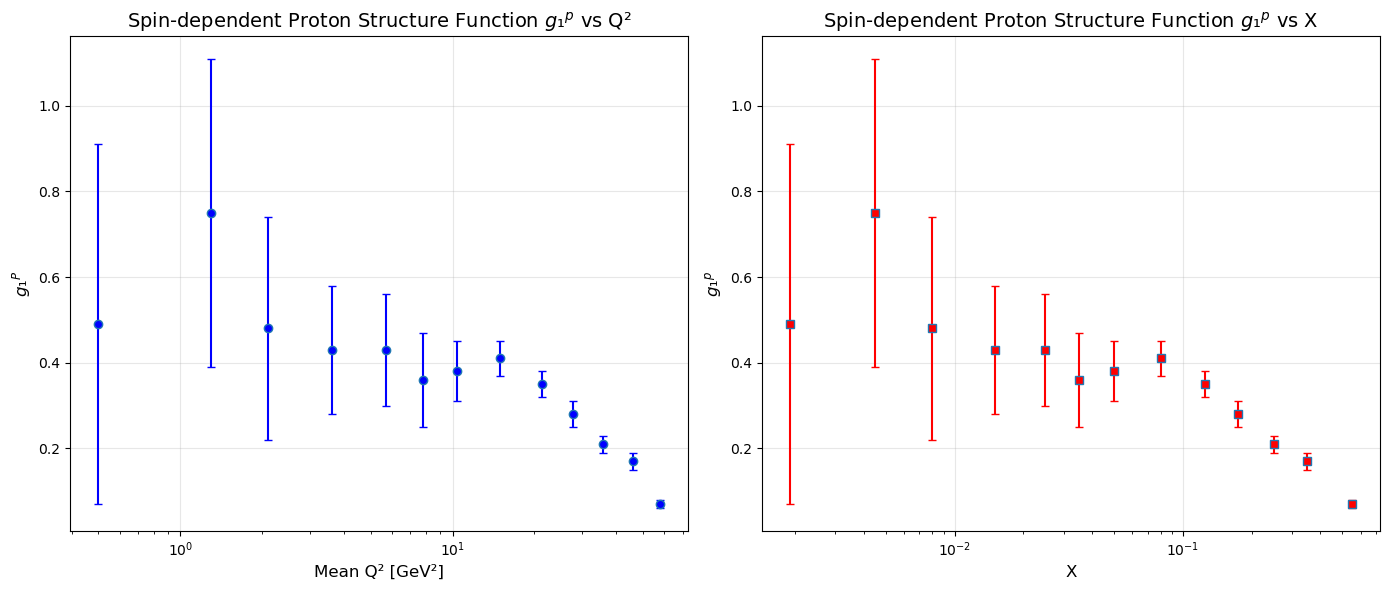

Data Summary:
Number of data points: 13
X range: 0.0019 to 0.5500
Q² range: 0.5 to 58.0 GeV²
G₁ range: 0.07 to 0.75

Data Table:
 X_avg  MEAN(NAME=Q**2) [GEV**2]   G1  stat +  stat -
0.0019                       0.5 0.49    0.42   -0.42
0.0045                       1.3 0.75    0.36   -0.36
0.0080                       2.1 0.48    0.26   -0.26
0.0150                       3.6 0.43    0.15   -0.15
0.0250                       5.7 0.43    0.13   -0.13
0.0350                       7.8 0.36    0.11   -0.11
0.0500                      10.4 0.38    0.07   -0.07
0.0800                      14.9 0.41    0.04   -0.04
0.1250                      21.3 0.35    0.03   -0.03
0.1750                      27.8 0.28    0.03   -0.03
0.2500                      35.6 0.21    0.02   -0.02
0.3500                      45.9 0.17    0.02   -0.02
0.5500                      58.0 0.07    0.01   -0.01


In [17]:
#Plotting and 
#Create the plots
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: G1 vs Mean Q^2
ax1.errorbar(q2_mean, g1, yerr=stat_error, fmt='o', capsize=3, capthick=1, 
             ecolor='blue', markerfacecolor='blue', 
             markersize=6, linewidth=1.5)
ax1.set_xlabel('Mean Q² [GeV²]', fontsize=12)
ax1.set_ylabel('$g₁^P$', fontsize=12)
ax1.set_title('Spin-dependent Proton Structure Function $g₁^p$ vs Q²', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log')

# Plot 2: G1 vs X
ax2.errorbar(x_avg, g1, yerr=stat_error, fmt='s', capsize=3, capthick=1, 
             ecolor='red', markerfacecolor='red', 
             markersize=6, linewidth=1.5)
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('$g₁^p$', fontsize=12)
ax2.set_title('Spin-dependent Proton Structure Function $g₁^p$ vs X', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.set_xscale('log')

plt.tight_layout()
plt.show()

# Print some basic statistics
print("Data Summary:")
print(f"Number of data points: {len(data)}")
print(f"X range: {x_avg.min():.4f} to {x_avg.max():.4f}")
print(f"Q² range: {q2_mean.min():.1f} to {q2_mean.max():.1f} GeV²")
print(f"G₁ range: {g1.min():.2f} to {g1.max():.2f}")

# Display the data table
print("\nData Table:")
print(data[['X_avg', 'MEAN(NAME=Q**2) [GEV**2]', 'G1', 'stat +', 'stat -']].to_string(index=False))